# Machine Learning Model for Portland Housing Data

This file has three parts:
1. Supvervised ML Model - Zillow Dataset
2. Supevised ML Model - AirBNB Dataset
3. Predictive Tool

# 1. Supervised ML Model - zillow Dataset

In [1]:
# import dependencies
# sklearn is the Scikit-learn machine learning library for Python
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sb

import sqlite3
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

## Explore the data

In [2]:
con = sqlite3.connect("finalprojectdatabase.db")
zlw = pd.read_sql_query("SELECT * from zillow_google", con)
zlw

,Address,City,Zipcode,bathrooms,bedrooms,daysOnZillow,homeType,latitude,livingArea,longitude,...,taxAssessedYear,url,yearBuilt,house_number,street_name,google_zip,google_neighborhood,lat_lng,zipcode_length,google_address
0,1121 SW 10th Dr,Gresham,97080,3.0,4.0,11.0,SINGLE_FAMILY,45.488228,2724.0,-122.444420,...,2020-01-01,https://www.zillow.com/homedetails/1121-SW-10t...,1982-01-01,1131,Southwest Florence Drive,97080,Gresham Butte,"45.48822784, -122.4444199",5,1131 Southwest Florence Drive
1,19309 NE Glisan St,Portland,97230,1.0,3.0,11.0,SINGLE_FAMILY,45.526634,1217.0,-122.464088,...,2017-01-01,https://www.zillow.com/homedetails/19309-NE-Gl...,1953-01-01,19309,Northeast Glisan Street,97230,North Gresham,"45.52663422, -122.4640884",5,19309 Northeast Glisan Street
2,1518 SE 12th St,Gresham,97080,2.0,3.0,14.0,SINGLE_FAMILY,45.487991,1150.0,-122.416184,...,2020-01-01,https://www.zillow.com/homedetails/1518-SE-12t...,1967-01-01,1518,Southeast 12th Street,97080,Asert,"45.48799133, -122.4161835",5,1518 Southeast 12th Street
3,110 NW Willowbrook Ct,Gresham,97030,2.0,3.0,25.0,SINGLE_FAMILY,45.498184,2036.0,-122.451332,...,2020-01-01,https://www.zillow.com/homedetails/110-NW-Will...,1978-01-01,110,Northwest Willowbrook Court,97030,Northwest,"45.4981842, -122.4513321",5,110 Northwest Willowbrook Court
4,3569 SW Mckinley St,Gresham,97080,3.0,3.0,41.0,SINGLE_FAMILY,45.475353,2209.0,-122.468307,...,2020-01-01,https://www.zillow.com/homedetails/3569-SW-Mck...,2017-01-01,3569,Southwest McKinley Street,97080,Pleasant Valley,"45.47535324, -122.4683075",5,3569 Southwest McKinley Street
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15347,15455 SW Gleneden Dr,Beaverton,97007,3.0,4.0,357.0,SINGLE_FAMILY,45.463707,2145.0,-122.835503,...,2019-01-01,https://www.zillow.com/homedetails/15455-SW-Gl...,1989-01-01,15455,Southwest Gleneden Drive,97007,Sexton Mountain,"45.46370697, -122.8355026",5,15455 Southwest Gleneden Drive
15348,7210 SW 156th Ave,Beaverton,97007,2.0,3.0,360.0,SINGLE_FAMILY,45.467113,1752.0,-122.837746,...,2019-01-01,https://www.zillow.com/homedetails/7210-SW-156...,1991-01-01,7210,Southwest 156th Avenue,97007,West Beaverton,"45.46711349, -122.8377457",5,7210 Southwest 156th Avenue
15349,7050 SW 152nd Ave,Beaverton,97007,2.0,3.0,360.0,SINGLE_FAMILY,45.468781,1924.0,-122.833855,...,2019-01-01,https://www.zillow.com/homedetails/7050-SW-152...,1981-01-01,7050,Southwest 152nd Avenue,97007,West Beaverton,"45.46878052, -122.8338547",5,7050 Southwest 152nd Avenue
15350,7600 SW Erica Pl,Beaverton,97008,2.0,3.0,363.0,SINGLE_FAMILY,45.465111,1378.0,-122.808701,...,2019-01-01,https://www.zillow.com/homedetails/7600-SW-Eri...,1977-01-01,7600,Southwest Erica Place,97008,Highland,"45.46511078, -122.8087006",5,7600 Southwest Erica Place


In [3]:
zlw = zlw.set_index('google_address', drop=False)
zlw.head()

,Address,City,Zipcode,bathrooms,bedrooms,daysOnZillow,homeType,latitude,livingArea,longitude,...,taxAssessedYear,url,yearBuilt,house_number,street_name,google_zip,google_neighborhood,lat_lng,zipcode_length,google_address
google_address,,,,,,,,,,,,,,,,,,,,,
1131 Southwest Florence Drive,1121 SW 10th Dr,Gresham,97080,3.0,4.0,11.0,SINGLE_FAMILY,45.488228,2724.0,-122.444420,...,2020-01-01,https://www.zillow.com/homedetails/1121-SW-10t...,1982-01-01,1131,Southwest Florence Drive,97080,Gresham Butte,"45.48822784, -122.4444199",5,1131 Southwest Florence Drive
19309 Northeast Glisan Street,19309 NE Glisan St,Portland,97230,1.0,3.0,11.0,SINGLE_FAMILY,45.526634,1217.0,-122.464088,...,2017-01-01,https://www.zillow.com/homedetails/19309-NE-Gl...,1953-01-01,19309,Northeast Glisan Street,97230,North Gresham,"45.52663422, -122.4640884",5,19309 Northeast Glisan Street
1518 Southeast 12th Street,1518 SE 12th St,Gresham,97080,2.0,3.0,14.0,SINGLE_FAMILY,45.487991,1150.0,-122.416184,...,2020-01-01,https://www.zillow.com/homedetails/1518-SE-12t...,1967-01-01,1518,Southeast 12th Street,97080,Asert,"45.48799133, -122.4161835",5,1518 Southeast 12th Street
110 Northwest Willowbrook Court,110 NW Willowbrook Ct,Gresham,97030,2.0,3.0,25.0,SINGLE_FAMILY,45.498184,2036.0,-122.451332,...,2020-01-01,https://www.zillow.com/homedetails/110-NW-Will...,1978-01-01,110,Northwest Willowbrook Court,97030,Northwest,"45.4981842, -122.4513321",5,110 Northwest Willowbrook Court
3569 Southwest McKinley Street,3569 SW Mckinley St,Gresham,97080,3.0,3.0,41.0,SINGLE_FAMILY,45.475353,2209.0,-122.468307,...,2020-01-01,https://www.zillow.com/homedetails/3569-SW-Mck...,2017-01-01,3569,Southwest McKinley Street,97080,Pleasant Valley,"45.47535324, -122.4683075",5,3569 Southwest McKinley Street


In [4]:
zlw.shape

(15352, 26)

In [5]:
cols = zlw.columns.to_list()
print(cols)

['Address', 'City', 'Zipcode', 'bathrooms', 'bedrooms', 'daysOnZillow', 'homeType', 'latitude', 'livingArea', 'longitude', 'lotSize', 'date_sold', 'price', 'pricePerSquareFoot', 'rentZestimate', 'taxAssessedValue', 'taxAssessedYear', 'url', 'yearBuilt', 'house_number', 'street_name', 'google_zip', 'google_neighborhood', 'lat_lng', 'zipcode_length', 'google_address']


In [6]:
zlw.shape

(15352, 26)

<AxesSubplot:>

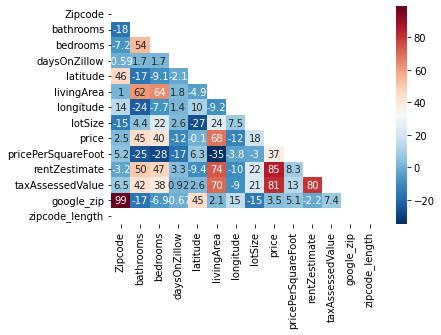

In [7]:
# correlation heatmap
mask = np.zeros_like(zlw.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# heatmap
sb.heatmap(zlw.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

In [8]:
# drop columns - use primary correlative variables (and any cat variables) that are
# also on the airbnb model so that we can predict airbnb price and house price together
zlw = zlw.drop(['Address', 'City','Zipcode', 'date_sold', 'latitude', 'longitude', 'url', 'house_number', 'street_name', 'lat_lng', 'zipcode_length', 'google_address'], axis=1)

In [9]:
zlw.head()

,bathrooms,bedrooms,daysOnZillow,homeType,livingArea,lotSize,price,pricePerSquareFoot,rentZestimate,taxAssessedValue,taxAssessedYear,yearBuilt,google_zip,google_neighborhood
google_address,,,,,,,,,,,,,,
1131 Southwest Florence Drive,3.0,4.0,11.0,SINGLE_FAMILY,2724.0,9583.0,512000,188.0,1995.0,397560.0,2020-01-01,1982-01-01,97080,Gresham Butte
19309 Northeast Glisan Street,1.0,3.0,11.0,SINGLE_FAMILY,1217.0,13939.0,348000,286.0,1695.0,269520.0,2017-01-01,1953-01-01,97230,North Gresham
1518 Southeast 12th Street,2.0,3.0,14.0,SINGLE_FAMILY,1150.0,7000.0,404200,351.0,1800.0,309260.0,2020-01-01,1967-01-01,97080,Asert
110 Northwest Willowbrook Court,2.0,3.0,25.0,SINGLE_FAMILY,2036.0,6969.0,478200,235.0,2250.0,373030.0,2020-01-01,1978-01-01,97030,Northwest
3569 Southwest McKinley Street,3.0,3.0,41.0,SINGLE_FAMILY,2209.0,5227.0,550000,249.0,2300.0,453610.0,2020-01-01,2017-01-01,97080,Pleasant Valley


In [10]:
zlw.dtypes

bathrooms              float64
bedrooms               float64
daysOnZillow           float64
homeType                object
livingArea             float64
lotSize                float64
price                    int64
pricePerSquareFoot     float64
rentZestimate          float64
taxAssessedValue       float64
taxAssessedYear         object
yearBuilt               object
google_zip               int64
google_neighborhood     object
dtype: object

<AxesSubplot:>

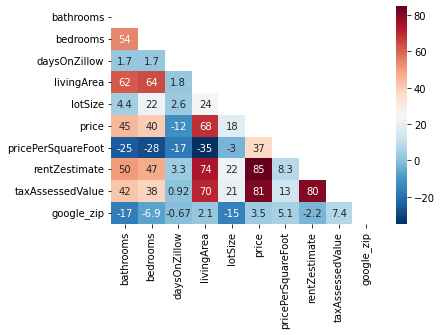

In [11]:
# correlation heatmap
mask = np.zeros_like(zlw.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# heatmap
sb.heatmap(zlw.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

The median house price is $529,000.00.


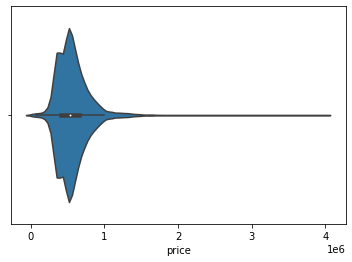

In [12]:
# view distribution of the target variable (price)
sb.violinplot(data=zlw, x='price')
print(f"The median house price is ${(zlw.price.median()):,.2f}.")

In [13]:
zlw.describe()

,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,price,pricePerSquareFoot,rentZestimate,taxAssessedValue,google_zip
count,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,1.535200e+04,15352.000000,15352.000000,1.535200e+04,15352.000000
mean,2.449062,3.364838,187.283090,2103.142001,6745.133598,5.630140e+05,278.990099,2744.981305,4.766790e+05,97155.832725
std,0.827578,0.780334,112.933593,776.956684,3149.658069,2.331034e+05,87.822736,873.433164,1.947564e+05,85.981683
min,1.000000,2.000000,1.000000,528.000000,421.000000,3.000000e+02,0.000000,1160.000000,9.500000e+02,97003.000000
25%,2.000000,3.000000,81.000000,1509.750000,4791.000000,4.150000e+05,228.000000,2200.000000,3.516200e+05,97068.000000
50%,3.000000,3.000000,191.000000,2016.000000,6098.000000,5.290000e+05,266.000000,2565.000000,4.392190e+05,97211.000000
75%,3.000000,4.000000,293.000000,2597.250000,8428.000000,6.500000e+05,316.000000,2999.000000,5.567500e+05,97222.000000
max,4.500000,5.000000,364.000000,4540.000000,17523.000000,4.000000e+06,2019.000000,14203.000000,2.826440e+06,97267.000000


In [14]:
zlw.dtypes

bathrooms              float64
bedrooms               float64
daysOnZillow           float64
homeType                object
livingArea             float64
lotSize                float64
price                    int64
pricePerSquareFoot     float64
rentZestimate          float64
taxAssessedValue       float64
taxAssessedYear         object
yearBuilt               object
google_zip               int64
google_neighborhood     object
dtype: object

In [15]:
# we know there is no missing/null or duplicate data because it was completed in the ETL file

In [16]:
# assign dummy values to object columns
# by hot encode categorical data
zlw_dum = pd.get_dummies(zlw, columns = ['homeType', 'google_neighborhood', 'taxAssessedYear', 'yearBuilt'])
zlw_dum.head()

,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,price,pricePerSquareFoot,rentZestimate,taxAssessedValue,google_zip,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
google_address,,,,,,,,,,,,,,,,,,,,,
1131 Southwest Florence Drive,3.0,4.0,11.0,2724.0,9583.0,512000,188.0,1995.0,397560.0,97080,...,0,0,0,0,0,0,0,0,0,0
19309 Northeast Glisan Street,1.0,3.0,11.0,1217.0,13939.0,348000,286.0,1695.0,269520.0,97230,...,0,0,0,0,0,0,0,0,0,0
1518 Southeast 12th Street,2.0,3.0,14.0,1150.0,7000.0,404200,351.0,1800.0,309260.0,97080,...,0,0,0,0,0,0,0,0,0,0
110 Northwest Willowbrook Court,2.0,3.0,25.0,2036.0,6969.0,478200,235.0,2250.0,373030.0,97030,...,0,0,0,0,0,0,0,0,0,0
3569 Southwest McKinley Street,3.0,3.0,41.0,2209.0,5227.0,550000,249.0,2300.0,453610.0,97080,...,0,0,0,0,0,1,0,0,0,0


In [17]:
zlw_dum.dtypes

bathrooms               float64
bedrooms                float64
daysOnZillow            float64
livingArea              float64
lotSize                 float64
                         ...   
yearBuilt_2017-01-01      uint8
yearBuilt_2018-01-01      uint8
yearBuilt_2019-01-01      uint8
yearBuilt_2020-01-01      uint8
yearBuilt_2021-01-01      uint8
Length: 337, dtype: object

## Scale & Normalize the Data

#### Resources
* https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832
* https://medium.com/p/b79592732b79
* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

## Machine Learning

#### StandardScaler

In [18]:
# set features list for assigning df after scaler
zlw_scaled_std = zlw_dum.copy()
zlw_scaled_std = zlw_scaled_std.drop('price', axis=1)
col_names_std_zlw = zlw_scaled_std.columns
features_std_zlw = zlw_scaled_std[col_names_std_zlw]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler_std_zlw = StandardScaler()

In [20]:
# set variables
y_std_zlw = zlw_dum.price
X_std_zlw = zlw_scaled_std

In [21]:
# fit and transform the X data; leave y data so we can interpret predicted price
zlw_scaled_std[col_names_std_zlw] = scaler_std_zlw.fit_transform(features_std_zlw.values)
zlw_scaled_std

,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,pricePerSquareFoot,rentZestimate,taxAssessedValue,google_zip,homeType_APARTMENT,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
google_address,,,,,,,,,,,,,,,,,,,,,
1131 Southwest Florence Drive,0.665745,0.813988,-1.560996,0.799116,0.901037,-1.036099,-0.858687,-0.406259,-0.881992,-0.086111,...,-0.097307,-0.09524,-0.090969,-0.103271,-0.112241,-0.105503,-0.088385,-0.079741,-0.13304,-0.063678
19309 Northeast Glisan Street,-1.751025,-0.467557,-1.560996,-1.140567,2.284089,0.079821,-1.202170,-1.063717,0.862622,-0.086111,...,-0.097307,-0.09524,-0.090969,-0.103271,-0.112241,-0.105503,-0.088385,-0.079741,-0.13304,-0.063678
1518 Southeast 12th Street,-0.542640,-0.467557,-1.534430,-1.226803,0.080921,0.819973,-1.081951,-0.859661,-0.881992,-0.086111,...,-0.097307,-0.09524,-0.090969,-0.103271,-0.112241,-0.105503,-0.088385,-0.079741,-0.13304,-0.063678
110 Northwest Willowbrook Court,-0.542640,-0.467557,-1.437025,-0.086419,0.071079,-0.500913,-0.566726,-0.532215,-1.463531,-0.086111,...,-0.097307,-0.09524,-0.090969,-0.103271,-0.112241,-0.105503,-0.088385,-0.079741,-0.13304,-0.063678
3569 Southwest McKinley Street,0.665745,-0.467557,-1.295344,0.136251,-0.482015,-0.341496,-0.509479,-0.118454,-0.881992,-0.086111,...,-0.097307,-0.09524,-0.090969,-0.103271,-0.112241,9.478409,-0.088385,-0.079741,-0.13304,-0.063678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15455 Southwest Gleneden Drive,0.665745,0.813988,1.502852,0.053876,-0.067036,-0.387043,0.057269,0.041905,-1.731038,-0.086111,...,-0.097307,-0.09524,-0.090969,-0.103271,-0.112241,-0.105503,-0.088385,-0.079741,-0.13304,-0.063678
7210 Southwest 156th Avenue,-0.542640,-0.467557,1.529417,-0.451960,0.762605,-0.512300,-0.323998,-0.379917,-1.731038,-0.086111,...,-0.097307,-0.09524,-0.090969,-0.103271,-0.112241,-0.105503,-0.088385,-0.079741,-0.13304,-0.063678
7050 Southwest 152nd Avenue,-0.542640,-0.467557,1.529417,-0.230576,2.422204,-0.307335,-0.209503,-0.341766,-1.731038,-0.086111,...,-0.097307,-0.09524,-0.090969,-0.103271,-0.112241,-0.105503,-0.088385,-0.079741,-0.13304,-0.063678


In [22]:
# check mean (~0) and standard deviation (~1) of the scaled data
zlw_scaled_std.describe()

,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,pricePerSquareFoot,rentZestimate,taxAssessedValue,google_zip,homeType_APARTMENT,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
count,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04,...,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04,1.535200e+04
mean,1.629176e-16,7.405344e-17,-2.962138e-17,1.703229e-16,1.258908e-16,1.888363e-16,5.183741e-17,4.443206e-17,4.543919e-14,1.110802e-17,...,2.221603e-17,3.100988e-17,-5.091174e-17,2.684437e-17,2.175320e-17,-5.507724e-17,-3.795239e-17,-6.479676e-18,3.702672e-18,1.295935e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,...,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-1.751025e+00,-1.749102e+00,-1.649546e+00,-2.027389e+00,-2.007945e+00,-3.176845e+00,-1.814716e+00,-2.442766e+00,-1.777561e+00,-8.611147e-02,...,-9.730725e-02,-9.523966e-02,-9.096878e-02,-1.032711e-01,-1.122413e-01,-1.055029e-01,-8.838545e-02,-7.974065e-02,-1.330402e-01,-6.367839e-02
25%,-5.426399e-01,-4.675569e-01,-9.411420e-01,-7.637637e-01,-6.204474e-01,-5.806214e-01,-6.239734e-01,-6.421510e-01,-1.021562e+00,-8.611147e-02,...,-9.730725e-02,-9.523966e-02,-9.096878e-02,-1.032711e-01,-1.122413e-01,-1.055029e-01,-8.838545e-02,-7.974065e-02,-1.330402e-01,-6.367839e-02
50%,6.657453e-01,-4.675569e-01,3.291342e-02,-1.121618e-01,-2.054682e-01,-1.479175e-01,-2.060686e-01,-1.923489e-01,6.416375e-01,-8.611147e-02,...,-9.730725e-02,-9.523966e-02,-9.096878e-02,-1.032711e-01,-1.122413e-01,-1.055029e-01,-8.838545e-02,-7.974065e-02,-1.330402e-01,-6.367839e-02
75%,6.657453e-01,8.139880e-01,9.361285e-01,6.359738e-01,5.343187e-01,4.214297e-01,2.908373e-01,4.111476e-01,7.695759e-01,-8.611147e-02,...,-9.730725e-02,-9.523966e-02,-9.096878e-02,-1.032711e-01,-1.122413e-01,-1.055029e-01,-8.838545e-02,-7.974065e-02,-1.330402e-01,-6.367839e-02
max,2.478323e+00,2.095533e+00,1.564837e+00,3.136516e+00,3.422028e+00,1.981340e+01,1.311880e+01,1.206552e+01,1.292960e+00,1.161286e+01,...,1.027673e+01,1.049983e+01,1.099278e+01,9.683255e+00,8.909375e+00,9.478409e+00,1.131408e+01,1.254066e+01,7.516524e+00,1.570391e+01


In [23]:
zlw_scaled_std.shape

(15352, 336)

In [24]:
from sklearn.model_selection import train_test_split
# split into testing and training sets
X_std_train_zlw, X_std_test_zlw, y_std_train_zlw, y_std_test_zlw = train_test_split(X_std_zlw, y_std_zlw, test_size=0.2, random_state=573)
print(X_std_train_zlw.shape)

(12281, 336)


In [25]:
from sklearn.linear_model import LinearRegression
model_std_zlw = LinearRegression()

In [26]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model_std_zlw.fit(X_std_zlw, y_std_zlw)
training_score_std_zlw = model_std_zlw.score(X_std_train_zlw, y_std_train_zlw)
testing_score_std_zlw = model_std_zlw.score(X_std_test_zlw, y_std_test_zlw)

print(f"Training Score: {training_score_std_zlw}")
print(f"Testing Score: {testing_score_std_zlw}")

Training Score: 0.9433279138683761
Testing Score: 0.931009736308354


In [27]:
y_pred_std_zlw = model_std_zlw.predict(X_std_test_zlw)

In [28]:
# compare actual vs predicted
regr_df_std_zlw = pd.DataFrame({'Actual':y_std_test_zlw, 'Predicted':y_pred_std_zlw, 'ABS Difference': abs(y_std_test_zlw-y_pred_std_zlw)})

In [29]:
regr_df_std_zlw.describe()

,Actual,Predicted,ABS Difference
count,3.071000e+03,3.071000e+03,3.071000e+03
mean,5.678953e+05,5.690429e+05,3.710668e+04
std,2.500889e+05,2.439163e+05,5.419966e+04
min,1.300000e+03,-1.188816e+05,1.756207e+01
25%,4.150000e+05,4.200904e+05,1.090645e+04
50%,5.270000e+05,5.305592e+05,2.473606e+04
75%,6.500000e+05,6.606827e+05,4.454844e+04
max,3.150000e+06,2.787590e+06,1.201158e+06


#### MinMaxScaler

In [30]:
# set features list for assigning df after scaler
zlw_scaled_mm = zlw_dum.copy()
zlw_scaled_mm = zlw_scaled_mm.drop('price', axis=1)
col_names_mm_zlw = zlw_scaled_mm.columns
features_mm_zlw = zlw_scaled_mm[col_names_mm_zlw]

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler_mm_zlw = MinMaxScaler()

In [32]:
# set variables
y_mm_zlw = zlw_dum.price
X_mm_zlw = zlw_scaled_mm

In [33]:
# fit and transform the data
zlw_scaled_mm[col_names_mm_zlw] = scaler_mm_zlw.fit_transform(features_mm_zlw.values)
zlw_scaled_mm

,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,pricePerSquareFoot,rentZestimate,taxAssessedValue,google_zip,homeType_APARTMENT,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
google_address,,,,,,,,,,,,,,,,,,,,,
1131 Southwest Florence Drive,0.571429,0.666667,0.027548,0.547358,0.535727,0.093115,0.064019,0.140369,0.291667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19309 Northeast Glisan Street,0.000000,0.333333,0.027548,0.171735,0.790434,0.141654,0.041018,0.095053,0.859848,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1518 Southeast 12th Street,0.285714,0.333333,0.035813,0.155035,0.384692,0.173848,0.049068,0.109117,0.291667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110 Northwest Willowbrook Court,0.285714,0.333333,0.066116,0.375872,0.382879,0.116394,0.083570,0.131687,0.102273,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3569 Southwest McKinley Street,0.571429,0.333333,0.110193,0.418993,0.281020,0.123328,0.087403,0.160206,0.291667,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15455 Southwest Gleneden Drive,0.571429,0.666667,0.980716,0.403041,0.357444,0.121347,0.125355,0.171259,0.015152,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7210 Southwest 156th Avenue,0.285714,0.333333,0.988981,0.305085,0.510233,0.115899,0.099824,0.142184,0.015152,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7050 Southwest 152nd Avenue,0.285714,0.333333,0.988981,0.347956,0.815869,0.124814,0.107491,0.144814,0.015152,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
zlw_scaled_mm.describe()

,bathrooms,bedrooms,daysOnZillow,livingArea,lotSize,pricePerSquareFoot,rentZestimate,taxAssessedValue,google_zip,homeType_APARTMENT,...,yearBuilt_2012-01-01,yearBuilt_2013-01-01,yearBuilt_2014-01-01,yearBuilt_2015-01-01,yearBuilt_2016-01-01,yearBuilt_2017-01-01,yearBuilt_2018-01-01,yearBuilt_2019-01-01,yearBuilt_2020-01-01,yearBuilt_2021-01-01
count,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,...,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000
mean,0.414018,0.454946,0.513177,0.392608,0.369789,0.138182,0.121520,0.168370,0.578912,0.007361,...,0.009380,0.008989,0.008207,0.010552,0.012441,0.011008,0.007751,0.006318,0.017392,0.004039
std,0.236451,0.260111,0.311112,0.193658,0.184169,0.043498,0.066966,0.068928,0.325688,0.085480,...,0.096398,0.094387,0.090225,0.102185,0.110848,0.104345,0.087703,0.079239,0.130731,0.063423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.333333,0.220386,0.244703,0.255526,0.112927,0.079736,0.124109,0.246212,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.333333,0.523416,0.370887,0.331949,0.131748,0.107721,0.155113,0.787879,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.571429,0.666667,0.804408,0.515765,0.468191,0.156513,0.140995,0.196709,0.829545,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
zlw_scaled_mm.shape

(15352, 336)

In [36]:
from sklearn.model_selection import train_test_split
# split into testing and training sets
X_mm_train_zlw, X_mm_test_zlw, y_mm_train_zlw, y_mm_test_zlw = train_test_split(X_mm_zlw, y_mm_zlw, test_size=0.2, random_state=573)
print(X_mm_train_zlw.shape)

(12281, 336)


In [37]:
from sklearn.linear_model import LinearRegression
model_mm_zlw = LinearRegression()

In [38]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model_mm_zlw.fit(X_mm_zlw, y_mm_zlw)
training_score_mm_zlw = model_mm_zlw.score(X_mm_train_zlw, y_mm_train_zlw)
testing_score_mm_zlw = model_mm_zlw.score(X_mm_test_zlw, y_mm_test_zlw)

print(f"Training Score: {training_score_mm_zlw}")
print(f"Testing Score: {testing_score_mm_zlw}")

Training Score: 0.9433100944917356
Testing Score: 0.9310472607642704


In [39]:
y_pred_mm_zlw = model_mm_zlw.predict(X_mm_test_zlw)

In [40]:
# compare actual vs predicted
regr_df_mm_zlw = pd.DataFrame({'Actual':y_mm_test_zlw, 'Predicted':y_pred_mm_zlw, 'ABS Difference': abs(y_mm_test_zlw-y_pred_mm_zlw)})
regr_df_mm_zlw

,Actual,Predicted,ABS Difference
google_address,,,
350 6th Street,769000,820736.0,51736.0
914 Northeast Portland Boulevard Court,570000,567040.0,2960.0
20855 Southwest 90th Avenue,450000,463616.0,13616.0
8827 Southeast Knapp Street,375000,316928.0,58072.0
1117-1119 Northeast 60th Avenue,265000,210944.0,54056.0
...,...,...,...
12610 Southwest Tiger Lilly Lane,428000,427520.0,480.0
17210 Northwest Gables Creek Lane,475000,475392.0,392.0
21600 Southwest 109th Terrace,670000,631808.0,38192.0


In [41]:
regr_df_mm_zlw.describe()

,Actual,Predicted,ABS Difference
count,3.071000e+03,3.071000e+03,3.071000e+03
mean,5.678953e+05,5.693145e+05,3.708003e+04
std,2.500889e+05,2.440470e+05,5.419625e+04
min,1.300000e+03,-1.185280e+05,3.200000e+01
25%,4.150000e+05,4.203520e+05,1.103300e+04
50%,5.270000e+05,5.306880e+05,2.471200e+04
75%,6.500000e+05,6.608640e+05,4.442400e+04
max,3.150000e+06,2.786304e+06,1.200576e+06


### Determine Error of the model
https://medium.com/@amanbamrah/how-to-evaluate-the-accuracy-of-regression-results-b38e5512afd3

https://machinelearningmastery.com/regression-metrics-for-machine-learning/

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)

#### StandardScaler

In [42]:
from sklearn import metrics

MAE_std_zlw = metrics.mean_absolute_error(y_std_test_zlw, y_pred_std_zlw)
MSE_std_zlw = metrics.mean_squared_error(y_std_test_zlw,y_pred_std_zlw)
RMSE_std_zlw = np.sqrt(MSE_std_zlw)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE_std_zlw}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE_std_zlw}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE_std_zlw}.')

The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

The mean absolute error for this model is 37106.6848042826.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

The mean squared error for this model is is 4313552498.53655.

The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.

The root mean squared error for this model is 65677.64078083614.


In [43]:
R2_std_zlw = model_std_zlw.score(X_std_zlw,y_std_zlw)
print(f'R2 score is {R2_std_zlw}')

R2 score is 0.9404985629581877


In [44]:
# calculate adjusted R2 since we have a multivariate regression
aR2_std_zlw = 1-(((1-R2_std_zlw)*(len(y_std_zlw)-1))/(len(y_std_zlw)-X_std_zlw.shape[1]-1))
print(f'Adjusted R2 score is {aR2_std_zlw}')
print(f'There are {len(y_std_zlw)} in the observation and {X_std_zlw.shape[1]} predictor variables.')

Adjusted R2 score is 0.9391670622691402
There are 15352 in the observation and 336 predictor variables.


#### MinMaxScaler

In [45]:
from sklearn import metrics

MAE_mm_zlw = metrics.mean_absolute_error(y_mm_test_zlw, y_pred_mm_zlw)
MSE_mm_zlw = metrics.mean_squared_error(y_mm_test_zlw,y_pred_mm_zlw)
RMSE_mm_zlw = np.sqrt(MSE_mm_zlw)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE_mm_zlw}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE_mm_zlw}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE_mm_zlw}.')

The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

The mean absolute error for this model is 37080.03386519049.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

The mean squared error for this model is is 4311206316.598502.

The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.

The root mean squared error for this model is 65659.77700692033.


In [46]:
R2_mm_zlw = model_mm_zlw.score(X_mm_zlw,y_mm_zlw)
print(f'R2 score is {R2_mm_zlw}')

R2 score is 0.9404934853311271


In [47]:
# calculate adjusted R2 since we have a multivariate regression
aR2_mm_zlw = 1-(((1-R2_mm_zlw)*(len(y_mm_zlw)-1))/(len(y_mm_zlw)-X_mm_zlw.shape[1]-1))
print(f'Adjusted R2 score is {aR2_mm_zlw}')
print(f'There are {len(y_mm_zlw)} in the observation and {X_mm_zlw.shape[1]} predictor variables.')

Adjusted R2 score is 0.9391618710168586
There are 15352 in the observation and 336 predictor variables.


### Results

The results between the StandardScaler and the the MinMaxScaler are nearly identical. However, the MinMaxScaler has a slightly lower RMSE and a slightly higher adjusted R2, so the MinMaxScaler is the recommended scaler for the dataset.

The RMSE of the MinMaxScaler indicates that on average, there is about a (USD)67k difference in actual price vs predicted price. The adjusted r-squared value of 0.9211 indicates that the model is a good fit.

## Future Steps

Fom the machine learning model, we have learned that we can relatively accurately predict the price of a house based on certain features. 

The next step is to automate feature selection (this version uses manual selection - ex. we knew we did not need URL to feed into the model) using scikit-learn and other methods (ex. decision trees & PCA).

Additionally, a next step for the model would be to integrate the model on the website we have created and have the model predict the price of a house based on features selected by the user. 

A future step that is outside of our current timeline is to finetune the model to lower the RMSE. This would include continuing to remove outliers, adding rows to the datasets, etc.

# 2. Supervised ML Model - airBNBDataset

## Explore the data

In [48]:
con = sqlite3.connect("finalprojectdatabase.db")
airbnb = pd.read_sql_query("SELECT * from arbnb_google", con)
airbnb.head()

,listing_url,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,...,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,house_number,street_name,google_zip,google_neighborhood,lat_lng,google_address
0,https://www.airbnb.com/rooms/12899,within an hour,100.0,100.0,1,0,Concordia,45.56488,-122.63418,Entire home/apt,...,4.99,4.93,4.94,4.08,5827,Northeast 31st Avenue,97211,Concordia,"45.56488, -122.63418",5827 Northeast 31st Avenue
1,https://www.airbnb.com/rooms/37676,within a day,100.0,55.0,1,1,Pearl,45.52564,-122.68273,Entire home/apt,...,4.77,4.94,4.66,0.91,1110,Northwest Flanders Street,97209,Northwest Portland,"45.52564, -122.68273",1110 Northwest Flanders Street
2,https://www.airbnb.com/rooms/41601,within an hour,100.0,100.0,1,1,Roseway,45.54804,-122.58541,Entire home/apt,...,4.92,4.67,4.83,1.76,7510,Northeast Fremont Street,97213,Roseway,"45.54804, -122.58541",7510 Northeast Fremont Street
3,https://www.airbnb.com/rooms/61893,within an hour,100.0,73.0,1,1,Goose Hollow,45.52258,-122.69955,Entire home/apt,...,5.00,5.00,4.93,0.24,2334,Southwest Cactus Drive,97205,Goose Hollow,"45.52258, -122.69955",2334 Southwest Cactus Drive
4,https://www.airbnb.com/rooms/80357,within an hour,100.0,52.0,1,1,Sullivan's Gulch,45.53364,-122.63895,Entire home/apt,...,5.00,5.00,5.00,0.02,2608,Northeast Halsey Street,97232,Sullivan's Gulch,"45.53364, -122.63895",2608 Northeast Halsey Street


In [49]:
airbnb.shape

(2037, 33)

In [50]:
cols = airbnb.columns.to_list()
print(cols)

['listing_url', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed', 'latitude', 'longitude', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'house_number', 'street_name', 'google_zip', 'google_neighborhood', 'lat_lng', 'google_address']


In [51]:
airbnb.dtypes

listing_url                     object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost                int64
host_identity_verified           int64
neighbourhood_cleansed          object
latitude                       float64
longitude                      float64
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
number_of_reviews_l30d           int64
last_review                     object
review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value      

<AxesSubplot:>

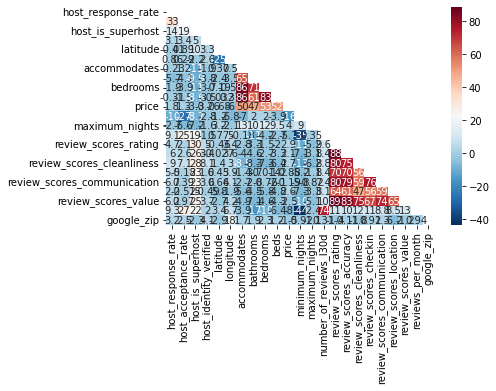

In [52]:
# correlation heatmap
mask = np.zeros_like(airbnb.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# heatmap
sb.heatmap(airbnb.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

In [53]:
# set airbnb data frame equal only to the columns that match zillow for machine learning
airbnb_ml = airbnb[['bathrooms', 'bedrooms', 'google_zip', 'google_neighborhood', 'price']]
airbnb_ml.head()

,bathrooms,bedrooms,google_zip,google_neighborhood,price
0,1.0,2.0,97211,Concordia,89.0
1,1.0,1.0,97209,Northwest Portland,14.0
2,1.0,1.0,97213,Roseway,129.0
3,1.0,1.0,97205,Goose Hollow,104.0
4,1.0,1.0,97232,Sullivan's Gulch,9.0


In [54]:
airbnb.shape

(2037, 33)

<AxesSubplot:>

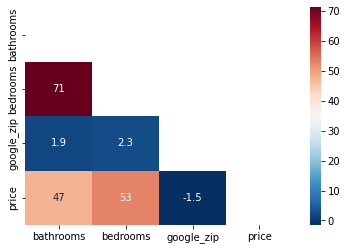

In [55]:
# correlation heatmap
mask = np.zeros_like(airbnb_ml.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# heatmap
sb.heatmap(airbnb_ml.corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask)

The median list price is $99.00.


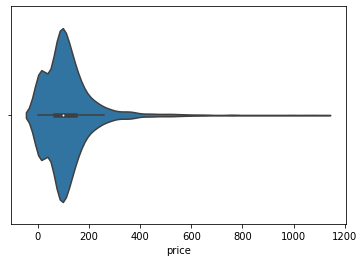

In [56]:
# view distribution of the target variable (price)
sb.violinplot(data=airbnb, x='price')
print(f"The median list price is ${(airbnb.price.median()):,.2f}.")

In [57]:
airbnb.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,google_zip
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,...,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,98.647521,92.409426,0.688267,0.845852,45.529699,-122.651421,4.017182,1.258959,1.651448,2.117820,...,1.913598,4.853790,4.886559,4.861885,4.922165,4.917104,4.882027,4.796917,2.756161,97213.808051
std,8.319295,16.134481,0.463315,0.361179,0.033001,0.043373,2.037998,0.542474,0.967174,1.309952,...,2.217407,0.284464,0.276035,0.279732,0.273581,0.270512,0.236392,0.308351,2.271774,10.531829
min,0.000000,0.000000,0.000000,0.000000,45.436120,-122.832860,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000,97035.000000
25%,100.000000,93.000000,0.000000,1.000000,45.508700,-122.679770,2.000000,1.000000,1.000000,1.000000,...,0.000000,4.830000,4.880000,4.840000,4.940000,4.920000,4.860000,4.750000,0.950000,97210.000000
50%,100.000000,98.000000,1.000000,1.000000,45.528380,-122.650990,4.000000,1.000000,1.000000,2.000000,...,1.000000,4.920000,4.950000,4.930000,4.980000,4.970000,4.930000,4.860000,2.260000,97212.000000
75%,100.000000,100.000000,1.000000,1.000000,45.556730,-122.625700,5.000000,1.000000,2.000000,2.000000,...,3.000000,4.980000,4.990000,4.990000,5.000000,5.000000,4.990000,4.930000,3.940000,97217.000000
max,100.000000,100.000000,1.000000,1.000000,45.612050,-122.496730,16.000000,5.000000,9.000000,16.000000,...,14.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,14.690000,97266.000000


In [58]:
airbnb_ml.dtypes

bathrooms              float64
bedrooms               float64
google_zip               int64
google_neighborhood     object
price                  float64
dtype: object

In [59]:
# we know there is no missing/null or duplicate data because it was completed in the ETL file

In [60]:
# assign dummy values to object columns
# by hot encode categorical data
airbnb_dum = pd.get_dummies(airbnb_ml, columns = ['google_neighborhood'])
# drop 'google_neighborhood_Sunderland' for Machine Learning (not in zillow data)
airbnb_dum = airbnb_dum.drop(['google_neighborhood_Sunderland'], axis=1)
airbnb_dum.head()

,bathrooms,bedrooms,google_zip,price,google_neighborhood_Arlington Heights,google_neighborhood_Boise,google_neighborhood_Brentwood-Darlington,google_neighborhood_Bridgeton,google_neighborhood_Brooklyn,google_neighborhood_Buckman Neighborhood,...,google_neighborhood_Southeast Portland,google_neighborhood_Southwest Hills,google_neighborhood_Southwest Portland,google_neighborhood_Sullivan's Gulch,google_neighborhood_Sumner,google_neighborhood_Sunnyside,google_neighborhood_Vernon,google_neighborhood_West Portland Park,google_neighborhood_Wilkes,google_neighborhood_Woodlawn
0,1.0,2.0,97211,89.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,97209,14.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,97213,129.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,97205,104.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,1.0,97232,9.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [61]:
airbnb_dum.dtypes

bathrooms                                 float64
bedrooms                                  float64
google_zip                                  int64
price                                     float64
google_neighborhood_Arlington Heights       uint8
                                           ...   
google_neighborhood_Sunnyside               uint8
google_neighborhood_Vernon                  uint8
google_neighborhood_West Portland Park      uint8
google_neighborhood_Wilkes                  uint8
google_neighborhood_Woodlawn                uint8
Length: 62, dtype: object

## Scale & Normalize the Data

#### Resources
* https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832
* https://medium.com/p/b79592732b79
* https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

## Machine Learning

#### StandardScaler

In [62]:
# set features list for assigning df after scaler
airbnb_scaled_std = airbnb_dum.copy()
airbnb_scaled_std = airbnb_scaled_std.drop('price', axis=1)
col_names_std_airbnb = airbnb_scaled_std.columns
features_std_airbnb = airbnb_scaled_std[col_names_std_airbnb]

In [63]:
from sklearn.preprocessing import StandardScaler
scaler_std_airbnb = StandardScaler()

In [64]:
# set variables
y_std_airbnb = airbnb_dum.price
X_std_airbnb = airbnb_scaled_std

In [65]:
# fit and transform the X data; leave y data so we can interpret predicted price
airbnb_scaled_std[col_names_std_airbnb] = scaler_std_airbnb.fit_transform(features_std_airbnb.values)
airbnb_scaled_std

,bathrooms,bedrooms,google_zip,google_neighborhood_Arlington Heights,google_neighborhood_Boise,google_neighborhood_Brentwood-Darlington,google_neighborhood_Bridgeton,google_neighborhood_Brooklyn,google_neighborhood_Buckman Neighborhood,google_neighborhood_Cathedral Park,...,google_neighborhood_Southeast Portland,google_neighborhood_Southwest Hills,google_neighborhood_Southwest Portland,google_neighborhood_Sullivan's Gulch,google_neighborhood_Sumner,google_neighborhood_Sunnyside,google_neighborhood_Vernon,google_neighborhood_West Portland Park,google_neighborhood_Wilkes,google_neighborhood_Woodlawn
0,-0.477485,0.360470,-0.266691,-0.049605,-0.080143,-0.091738,-0.038405,-0.088977,-0.213747,-0.083189,...,-0.290972,-0.083189,-0.265359,-0.080143,-0.054353,-0.187246,-0.160249,-0.073685,-0.044357,-0.118056
1,-0.477485,-0.673724,-0.456638,-0.049605,-0.080143,-0.091738,-0.038405,-0.088977,-0.213747,-0.083189,...,-0.290972,-0.083189,-0.265359,-0.080143,-0.054353,-0.187246,-0.160249,-0.073685,-0.044357,-0.118056
2,-0.477485,-0.673724,-0.076744,-0.049605,-0.080143,-0.091738,-0.038405,-0.088977,-0.213747,-0.083189,...,-0.290972,-0.083189,-0.265359,-0.080143,-0.054353,-0.187246,-0.160249,-0.073685,-0.044357,-0.118056
3,-0.477485,-0.673724,-0.836532,-0.049605,-0.080143,-0.091738,-0.038405,-0.088977,-0.213747,-0.083189,...,-0.290972,-0.083189,-0.265359,-0.080143,-0.054353,-0.187246,-0.160249,-0.073685,-0.044357,-0.118056
4,-0.477485,-0.673724,1.727755,-0.049605,-0.080143,-0.091738,-0.038405,-0.088977,-0.213747,-0.083189,...,-0.290972,-0.083189,-0.265359,12.477672,-0.054353,-0.187246,-0.160249,-0.073685,-0.044357,-0.118056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,-0.477485,0.360470,-0.741559,-0.049605,-0.080143,10.900621,-0.038405,-0.088977,-0.213747,-0.083189,...,-0.290972,-0.083189,-0.265359,-0.080143,-0.054353,-0.187246,-0.160249,-0.073685,-0.044357,-0.118056
2033,-0.477485,-0.673724,-0.456638,-0.049605,-0.080143,-0.091738,-0.038405,-0.088977,-0.213747,-0.083189,...,-0.290972,-0.083189,-0.265359,-0.080143,-0.054353,-0.187246,-0.160249,-0.073685,-0.044357,-0.118056
2034,-0.477485,-0.673724,2.392570,-0.049605,-0.080143,-0.091738,-0.038405,-0.088977,-0.213747,-0.083189,...,-0.290972,-0.083189,3.768487,-0.080143,-0.054353,-0.187246,-0.160249,-0.073685,-0.044357,-0.118056
2035,2.288306,1.394664,0.303151,-0.049605,-0.080143,-0.091738,-0.038405,-0.088977,-0.213747,-0.083189,...,-0.290972,-0.083189,-0.265359,-0.080143,-0.054353,-0.187246,-0.160249,-0.073685,-0.044357,-0.118056


In [66]:
# check mean (~0) and standard deviation (~1) of the scaled data
airbnb_scaled_std.describe()

,bathrooms,bedrooms,google_zip,google_neighborhood_Arlington Heights,google_neighborhood_Boise,google_neighborhood_Brentwood-Darlington,google_neighborhood_Bridgeton,google_neighborhood_Brooklyn,google_neighborhood_Buckman Neighborhood,google_neighborhood_Cathedral Park,...,google_neighborhood_Southeast Portland,google_neighborhood_Southwest Hills,google_neighborhood_Southwest Portland,google_neighborhood_Sullivan's Gulch,google_neighborhood_Sumner,google_neighborhood_Sunnyside,google_neighborhood_Vernon,google_neighborhood_West Portland Park,google_neighborhood_Wilkes,google_neighborhood_Woodlawn
count,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03,...,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03,2.037000e+03
mean,6.976365e-17,8.022819e-17,1.764078e-13,-6.104319e-18,4.534637e-17,-5.581092e-17,1.918500e-17,2.092909e-17,-4.185819e-17,-2.092909e-17,...,7.674001e-17,-2.790546e-17,-1.220864e-17,4.534637e-17,3.837001e-17,-1.395273e-17,-5.755501e-17,-2.092909e-17,-2.441728e-17,3.313773e-17
std,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,...,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00,1.000246e+00
min,-4.774848e-01,-6.737235e-01,-1.698204e+01,-4.960474e-02,-8.014315e-02,-9.173790e-02,-3.840477e-02,-8.897681e-02,-2.137472e-01,-8.318903e-02,...,-2.909717e-01,-8.318903e-02,-2.653585e-01,-8.014315e-02,-5.435264e-02,-1.872458e-01,-1.602491e-01,-7.368458e-02,-4.435691e-02,-1.180563e-01
25%,-4.774848e-01,-6.737235e-01,-3.616643e-01,-4.960474e-02,-8.014315e-02,-9.173790e-02,-3.840477e-02,-8.897681e-02,-2.137472e-01,-8.318903e-02,...,-2.909717e-01,-8.318903e-02,-2.653585e-01,-8.014315e-02,-5.435264e-02,-1.872458e-01,-1.602491e-01,-7.368458e-02,-4.435691e-02,-1.180563e-01
50%,-4.774848e-01,-6.737235e-01,-1.717171e-01,-4.960474e-02,-8.014315e-02,-9.173790e-02,-3.840477e-02,-8.897681e-02,-2.137472e-01,-8.318903e-02,...,-2.909717e-01,-8.318903e-02,-2.653585e-01,-8.014315e-02,-5.435264e-02,-1.872458e-01,-1.602491e-01,-7.368458e-02,-4.435691e-02,-1.180563e-01
75%,-4.774848e-01,3.604700e-01,3.031508e-01,-4.960474e-02,-8.014315e-02,-9.173790e-02,-3.840477e-02,-8.897681e-02,-2.137472e-01,-8.318903e-02,...,-2.909717e-01,-8.318903e-02,-2.653585e-01,-8.014315e-02,-5.435264e-02,-1.872458e-01,-1.602491e-01,-7.368458e-02,-4.435691e-02,-1.180563e-01
max,6.897958e+00,7.599825e+00,4.956856e+00,2.015937e+01,1.247767e+01,1.090062e+01,2.603843e+01,1.123888e+01,4.678423e+00,1.202082e+01,...,3.436760e+00,1.202082e+01,3.768487e+00,1.247767e+01,1.839837e+01,5.340575e+00,6.240287e+00,1.357136e+01,2.254440e+01,8.470537e+00


In [67]:
airbnb_scaled_std.shape

(2037, 61)

In [68]:
from sklearn.model_selection import train_test_split
# split into testing and training sets
X_std_train_airbnb, X_std_test_airbnb, y_std_train_airbnb, y_std_test_airbnb = train_test_split(X_std_airbnb, y_std_airbnb, test_size=0.2, random_state=573)
print(X_std_train_airbnb.shape)

(1629, 61)


In [69]:
from sklearn.linear_model import LinearRegression
model_std_airbnb = LinearRegression()

In [70]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model_std_airbnb.fit(X_std_airbnb, y_std_airbnb)
training_score_std_airbnb = model_std_airbnb.score(X_std_train_airbnb, y_std_train_airbnb)
testing_score_std_airbnb = model_std_airbnb.score(X_std_test_airbnb, y_std_test_airbnb)

print(f"Training Score: {training_score_std_airbnb}")
print(f"Testing Score: {testing_score_std_airbnb}")

Training Score: 0.32176289646637224
Testing Score: 0.32979241006870774


In [71]:
y_pred_std_airbnb = model_std_airbnb.predict(X_std_test_airbnb)

In [72]:
# compare actual vs predicted
regr_df_std_airbnb = pd.DataFrame({'Actual':y_std_test_airbnb, 'Predicted':y_pred_std_airbnb, 'ABS Difference': abs(y_std_test_airbnb-y_pred_std_airbnb)})

In [73]:
regr_df_std_airbnb.describe()

,Actual,Predicted,ABS Difference
count,408.000000,408.000000,408.000000
mean,117.622549,116.057269,58.055471
std,118.072187,62.658305,77.231295
min,1.000000,43.661857,0.182509
25%,70.500000,75.652828,15.506637
50%,95.000000,97.465470,34.050470
75%,135.000000,135.444833,70.851296
max,1096.000000,576.678737,884.647094


#### MinMaxScaler

In [74]:
# set features list for assigning df after scaler
airbnb_scaled_mm = airbnb_dum.copy()
airbnb_scaled_mm = airbnb_scaled_mm.drop('price', axis=1)
col_names_mm_airbnb = airbnb_scaled_mm.columns
features_mm_airbnb = airbnb_scaled_mm[col_names_mm_airbnb]

In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler_mm_airbnb = MinMaxScaler()

In [76]:
# set variables
y_mm_airbnb = airbnb_dum.price
X_mm_airbnb = airbnb_scaled_mm

In [77]:
# fit and transform the data
airbnb_scaled_mm[col_names_mm_airbnb] = scaler_mm_airbnb.fit_transform(features_mm_airbnb.values)
airbnb_scaled_mm

,bathrooms,bedrooms,google_zip,google_neighborhood_Arlington Heights,google_neighborhood_Boise,google_neighborhood_Brentwood-Darlington,google_neighborhood_Bridgeton,google_neighborhood_Brooklyn,google_neighborhood_Buckman Neighborhood,google_neighborhood_Cathedral Park,...,google_neighborhood_Southeast Portland,google_neighborhood_Southwest Hills,google_neighborhood_Southwest Portland,google_neighborhood_Sullivan's Gulch,google_neighborhood_Sumner,google_neighborhood_Sunnyside,google_neighborhood_Vernon,google_neighborhood_West Portland Park,google_neighborhood_Wilkes,google_neighborhood_Woodlawn
0,0.000,0.125,0.761905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000,0.000,0.753247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.000,0.770563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.000,0.735931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000,0.000,0.852814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,0.000,0.125,0.740260,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2033,0.000,0.000,0.753247,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2034,0.000,0.000,0.883117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2035,0.375,0.250,0.787879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
airbnb_scaled_mm.describe()

,bathrooms,bedrooms,google_zip,google_neighborhood_Arlington Heights,google_neighborhood_Boise,google_neighborhood_Brentwood-Darlington,google_neighborhood_Bridgeton,google_neighborhood_Brooklyn,google_neighborhood_Buckman Neighborhood,google_neighborhood_Cathedral Park,...,google_neighborhood_Southeast Portland,google_neighborhood_Southwest Hills,google_neighborhood_Southwest Portland,google_neighborhood_Sullivan's Gulch,google_neighborhood_Sumner,google_neighborhood_Sunnyside,google_neighborhood_Vernon,google_neighborhood_West Portland Park,google_neighborhood_Wilkes,google_neighborhood_Woodlawn
count,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,...,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000
mean,0.064740,0.081431,0.774061,0.002455,0.006382,0.008346,0.001473,0.007855,0.043692,0.006873,...,0.078056,0.006873,0.065783,0.006382,0.002946,0.033873,0.025037,0.005400,0.001964,0.013746
std,0.135618,0.120897,0.045592,0.049495,0.079651,0.090995,0.038358,0.088300,0.204458,0.082638,...,0.268326,0.082638,0.247963,0.079651,0.054206,0.180948,0.156275,0.073305,0.044281,0.116462
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.757576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.766234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.125000,0.787879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
airbnb_scaled_mm.columns

Index(['bathrooms', 'bedrooms', 'google_zip',
       'google_neighborhood_Arlington Heights', 'google_neighborhood_Boise',
       'google_neighborhood_Brentwood-Darlington',
       'google_neighborhood_Bridgeton', 'google_neighborhood_Brooklyn',
       'google_neighborhood_Buckman Neighborhood',
       'google_neighborhood_Cathedral Park', 'google_neighborhood_Centennial',
       'google_neighborhood_Concordia',
       'google_neighborhood_Creston - Kenilworth', 'google_neighborhood_Cully',
       'google_neighborhood_East Columbia', 'google_neighborhood_Eastmoreland',
       'google_neighborhood_Eliot', 'google_neighborhood_Foster - Powell',
       'google_neighborhood_Glenfair', 'google_neighborhood_Goose Hollow',
       'google_neighborhood_Grant Park', 'google_neighborhood_Hayden Island',
       'google_neighborhood_Hayhurst', 'google_neighborhood_Hazelwood',
       'google_neighborhood_Hollywood',
       'google_neighborhood_Hosford-Abernethy', 'google_neighborhood_Humboldt',
    

In [80]:
airbnb_scaled_mm.shape

(2037, 61)

In [81]:
from sklearn.model_selection import train_test_split
# split into testing and training sets
X_mm_train_airbnb, X_mm_test_airbnb, y_mm_train_airbnb, y_mm_test_airbnb = train_test_split(X_mm_airbnb, y_mm_airbnb, test_size=0.2, random_state=573)
print(X_mm_train_airbnb.shape)

(1629, 61)


In [82]:
from sklearn.linear_model import LinearRegression
model_mm_airbnb = LinearRegression()

In [83]:
# Fit the model to the training data, and calculate the scores for the training and testing data.
model_mm_airbnb.fit(X_mm_airbnb, y_mm_airbnb)
training_score_mm_airbnb = model_mm_airbnb.score(X_mm_train_airbnb, y_mm_train_airbnb)
testing_score_mm_airbnb = model_mm_airbnb.score(X_mm_test_airbnb, y_mm_test_airbnb)

print(f"Training Score: {training_score_mm_airbnb}")
print(f"Testing Score: {testing_score_mm_airbnb}")

Training Score: 0.32176289646637246
Testing Score: 0.32979241006870674


In [84]:
y_pred_mm_airbnb = model_mm_airbnb.predict(X_mm_test_airbnb)

In [85]:
# compare actual vs predicted
regr_df_mm_airbnb = pd.DataFrame({'Actual':y_mm_test_airbnb, 'Predicted':y_pred_mm_airbnb, 'ABS Difference': abs(y_mm_test_airbnb-y_pred_mm_airbnb)})
regr_df_mm_airbnb

,Actual,Predicted,ABS Difference
1594,68.0,72.513275,4.513275
1834,6.0,53.954136,47.954136
392,93.0,72.043570,20.956430
862,85.0,83.105620,1.894380
317,18.0,143.531320,125.531320
...,...,...,...
1814,149.0,181.126068,32.126068
1109,118.0,181.744982,63.744982
1439,274.0,173.627865,100.372135
133,101.0,74.219851,26.780149


In [86]:
regr_df_mm_airbnb.describe()

,Actual,Predicted,ABS Difference
count,408.000000,408.000000,408.000000
mean,117.622549,116.057269,58.055471
std,118.072187,62.658305,77.231295
min,1.000000,43.661857,0.182509
25%,70.500000,75.652828,15.506637
50%,95.000000,97.465470,34.050470
75%,135.000000,135.444833,70.851296
max,1096.000000,576.678737,884.647094


### Determine Error of the model
https://medium.com/@amanbamrah/how-to-evaluate-the-accuracy-of-regression-results-b38e5512afd3

https://machinelearningmastery.com/regression-metrics-for-machine-learning/

There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

* Mean Squared Error (MSE).
* Root Mean Squared Error (RMSE).
* Mean Absolute Error (MAE)

#### StandardScaler

In [87]:
from sklearn import metrics

MAE_std_airbnb = metrics.mean_absolute_error(y_std_test_airbnb, y_pred_std_airbnb)
MSE_std_airbnb = metrics.mean_squared_error(y_std_test_airbnb,y_pred_std_airbnb)
RMSE_std_airbnb = np.sqrt(MSE_std_airbnb)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE_std_airbnb}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE_std_airbnb}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE_std_airbnb}.')

The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

The mean absolute error for this model is 58.055471130223545.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

The mean squared error for this model is is 9320.49132520073.

The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.

The root mean squared error for this model is 96.54269172340665.


In [88]:
R2_std_airbnb = model_std_airbnb.score(X_std_airbnb,y_std_airbnb)
print(f'R2 score is {R2_std_airbnb}')

R2 score is 0.32370368330299415


In [89]:
# calculate adjusted R2 since we have a multivariate regression
aR2_std_airbnb = 1-(((1-R2_std_airbnb)*(len(y_std_airbnb)-1))/(len(y_std_airbnb)-X_std_airbnb.shape[1]-1))
print(f'Adjusted R2 score is {aR2_std_airbnb}')
print(f'There are {len(y_std_airbnb)} in the observation and {X_std_airbnb.shape[1]} predictor variables.')

Adjusted R2 score is 0.30281554390121324
There are 2037 in the observation and 61 predictor variables.


#### MinMaxScaler

In [90]:
from sklearn import metrics

MAE_mm_airbnb = metrics.mean_absolute_error(y_mm_test_airbnb, y_pred_mm_airbnb)
MSE_mm_airbnb = metrics.mean_squared_error(y_mm_test_airbnb,y_pred_mm_airbnb)
RMSE_mm_airbnb = np.sqrt(MSE_mm_airbnb)

print(f'The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.\n\nThe mean absolute error for this model is {MAE_mm_airbnb}.\n')
print(f'The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.\n\nThe mean squared error for this model is is {MSE_mm_airbnb}.\n')
print(f'The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.\n\nThe root mean squared error for this model is {RMSE_mm_airbnb}.')

The MAE score is calculated as the average of the absolute error values. The MAE does not give more or less weight to different types of errors and instead the scores increase linearly with increases in error. MAE refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

The mean absolute error for this model is 58.05547113022356.

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset.

The mean squared error for this model is is 9320.491325200743.

The RMSE is an extension of the mean squared error. Importantly, the square root of the error is calculated, which means that the units of the RMSE are the same as the original units of the target value that is being predicted.The RMSE is essentially the average distance between the predicted value and the actual value.

The root mean squared error for this model is 96.5426917234067.


In [91]:
R2_mm_airbnb = model_mm_airbnb.score(X_mm_airbnb,y_mm_airbnb)
print(f'R2 score is {R2_mm_airbnb}')

R2 score is 0.32370368330299415


In [92]:
# calculate adjusted R2 since we have a multivariate regression
aR2_mm_airbnb = 1-(((1-R2_mm_airbnb)*(len(y_mm_airbnb)-1))/(len(y_mm_airbnb)-X_mm_airbnb.shape[1]-1))
print(f'Adjusted R2 score is {aR2_mm_airbnb}')
print(f'There are {len(y_mm_airbnb)} in the observation and {X_mm_airbnb.shape[1]} predictor variables.')

Adjusted R2 score is 0.30281554390121324
There are 2037 in the observation and 61 predictor variables.


In [93]:
airbnb_scaled_mm.columns

Index(['bathrooms', 'bedrooms', 'google_zip',
       'google_neighborhood_Arlington Heights', 'google_neighborhood_Boise',
       'google_neighborhood_Brentwood-Darlington',
       'google_neighborhood_Bridgeton', 'google_neighborhood_Brooklyn',
       'google_neighborhood_Buckman Neighborhood',
       'google_neighborhood_Cathedral Park', 'google_neighborhood_Centennial',
       'google_neighborhood_Concordia',
       'google_neighborhood_Creston - Kenilworth', 'google_neighborhood_Cully',
       'google_neighborhood_East Columbia', 'google_neighborhood_Eastmoreland',
       'google_neighborhood_Eliot', 'google_neighborhood_Foster - Powell',
       'google_neighborhood_Glenfair', 'google_neighborhood_Goose Hollow',
       'google_neighborhood_Grant Park', 'google_neighborhood_Hayden Island',
       'google_neighborhood_Hayhurst', 'google_neighborhood_Hazelwood',
       'google_neighborhood_Hollywood',
       'google_neighborhood_Hosford-Abernethy', 'google_neighborhood_Humboldt',
    

### Results

The results between the StandardScaler and the the MinMaxScaler are nearly identical. An RMSE of about (USD)95 is not necessarily a poor fit RMSE, however, the low adjusted r-squared is indicative that the predicted model is not necessarily a good fit for the dataset. It would be recommended to further fine-tune this model.

# 3. Predictive Tool

Predict the potential airbnb price of our zillow dataset.

In [94]:
airbnb_price = pd.DataFrame(columns = ['bathrooms', 'bedrooms', 'google_zip',
       'google_neighborhood_Arlington Heights', 'google_neighborhood_Boise',
       'google_neighborhood_Brentwood-Darlington',
       'google_neighborhood_Bridgeton', 'google_neighborhood_Brooklyn',
       'google_neighborhood_Buckman Neighborhood',
       'google_neighborhood_Cathedral Park', 'google_neighborhood_Centennial',
       'google_neighborhood_Concordia',
       'google_neighborhood_Creston - Kenilworth', 'google_neighborhood_Cully',
       'google_neighborhood_East Columbia', 'google_neighborhood_Eastmoreland',
       'google_neighborhood_Eliot', 'google_neighborhood_Foster - Powell',
       'google_neighborhood_Glenfair', 'google_neighborhood_Goose Hollow',
       'google_neighborhood_Grant Park', 'google_neighborhood_Hayden Island',
       'google_neighborhood_Hayhurst', 'google_neighborhood_Hazelwood',
       'google_neighborhood_Hollywood',
       'google_neighborhood_Hosford-Abernethy', 'google_neighborhood_Humboldt',
       'google_neighborhood_Irvington', 'google_neighborhood_Kerns',
       'google_neighborhood_King', "google_neighborhood_Ladd's Addition",
       'google_neighborhood_Laurelhurst', 'google_neighborhood_Lents',
       'google_neighborhood_Markham', 'google_neighborhood_Mill Park',
       'google_neighborhood_Montavilla',
       'google_neighborhood_Mount Scott - Arleta',
       'google_neighborhood_North Portland', 'google_neighborhood_North Tabor',
       'google_neighborhood_Northeast Portland',
       'google_neighborhood_Northwest Portland',
       'google_neighborhood_Overlook', 'google_neighborhood_Parkrose Heights',
       'google_neighborhood_Pleasant Valley',
       'google_neighborhood_Powellhurst-Gilbert', 'google_neighborhood_Reed',
       'google_neighborhood_Richmond', 'google_neighborhood_Rose City Park',
       'google_neighborhood_Roseway', 'google_neighborhood_Sabin',
       'google_neighborhood_South Tabor',
       'google_neighborhood_Southeast Portland',
       'google_neighborhood_Southwest Hills',
       'google_neighborhood_Southwest Portland',
       "google_neighborhood_Sullivan's Gulch", 'google_neighborhood_Sumner',
       'google_neighborhood_Sunnyside', 'google_neighborhood_Vernon',
       'google_neighborhood_West Portland Park', 'google_neighborhood_Wilkes',
       'google_neighborhood_Woodlawn'])
airbnb_price

,bathrooms,bedrooms,google_zip,google_neighborhood_Arlington Heights,google_neighborhood_Boise,google_neighborhood_Brentwood-Darlington,google_neighborhood_Bridgeton,google_neighborhood_Brooklyn,google_neighborhood_Buckman Neighborhood,google_neighborhood_Cathedral Park,...,google_neighborhood_Southeast Portland,google_neighborhood_Southwest Hills,google_neighborhood_Southwest Portland,google_neighborhood_Sullivan's Gulch,google_neighborhood_Sumner,google_neighborhood_Sunnyside,google_neighborhood_Vernon,google_neighborhood_West Portland Park,google_neighborhood_Wilkes,google_neighborhood_Woodlawn


In [95]:
airbnb_price['bathrooms'] = zlw_scaled_mm['bathrooms']
airbnb_price['bedrooms'] = zlw_scaled_mm['bedrooms']
airbnb_price['google_zip'] = zlw_scaled_mm['google_zip']
airbnb_price[['google_neighborhood_Arlington Heights', 'google_neighborhood_Boise',
       'google_neighborhood_Brentwood-Darlington',
       'google_neighborhood_Bridgeton', 'google_neighborhood_Brooklyn',
       'google_neighborhood_Buckman Neighborhood',
       'google_neighborhood_Cathedral Park', 'google_neighborhood_Centennial',
       'google_neighborhood_Concordia',
       'google_neighborhood_Creston - Kenilworth', 'google_neighborhood_Cully',
       'google_neighborhood_East Columbia', 'google_neighborhood_Eastmoreland',
       'google_neighborhood_Eliot', 'google_neighborhood_Foster - Powell',
       'google_neighborhood_Glenfair', 'google_neighborhood_Goose Hollow',
       'google_neighborhood_Grant Park', 'google_neighborhood_Hayden Island',
       'google_neighborhood_Hayhurst', 'google_neighborhood_Hazelwood',
       'google_neighborhood_Hollywood',
       'google_neighborhood_Hosford-Abernethy', 'google_neighborhood_Humboldt',
       'google_neighborhood_Irvington', 'google_neighborhood_Kerns',
       'google_neighborhood_King', "google_neighborhood_Ladd's Addition",
       'google_neighborhood_Laurelhurst', 'google_neighborhood_Lents',
       'google_neighborhood_Markham', 'google_neighborhood_Mill Park',
       'google_neighborhood_Montavilla',
       'google_neighborhood_Mount Scott - Arleta',
       'google_neighborhood_North Portland', 'google_neighborhood_North Tabor',
       'google_neighborhood_Northeast Portland',
       'google_neighborhood_Northwest Portland',
       'google_neighborhood_Overlook', 'google_neighborhood_Parkrose Heights',
       'google_neighborhood_Pleasant Valley',
       'google_neighborhood_Powellhurst-Gilbert', 'google_neighborhood_Reed',
       'google_neighborhood_Richmond', 'google_neighborhood_Rose City Park',
       'google_neighborhood_Roseway', 'google_neighborhood_Sabin',
       'google_neighborhood_South Tabor',
       'google_neighborhood_Southeast Portland',
       'google_neighborhood_Southwest Hills',
       'google_neighborhood_Southwest Portland',
       "google_neighborhood_Sullivan's Gulch", 'google_neighborhood_Sumner', 'google_neighborhood_Sunnyside',
       'google_neighborhood_Vernon', 'google_neighborhood_West Portland Park',
       'google_neighborhood_Wilkes', 'google_neighborhood_Woodlawn']] = zlw_scaled_mm[['google_neighborhood_Arlington Heights', 'google_neighborhood_Boise',
       'google_neighborhood_Brentwood-Darlington',
       'google_neighborhood_Bridgeton', 'google_neighborhood_Brooklyn',
       'google_neighborhood_Buckman Neighborhood',
       'google_neighborhood_Cathedral Park', 'google_neighborhood_Centennial',
       'google_neighborhood_Concordia',
       'google_neighborhood_Creston - Kenilworth', 'google_neighborhood_Cully',
       'google_neighborhood_East Columbia', 'google_neighborhood_Eastmoreland',
       'google_neighborhood_Eliot', 'google_neighborhood_Foster - Powell',
       'google_neighborhood_Glenfair', 'google_neighborhood_Goose Hollow',
       'google_neighborhood_Grant Park', 'google_neighborhood_Hayden Island',
       'google_neighborhood_Hayhurst', 'google_neighborhood_Hazelwood',
       'google_neighborhood_Hollywood',
       'google_neighborhood_Hosford-Abernethy', 'google_neighborhood_Humboldt',
       'google_neighborhood_Irvington', 'google_neighborhood_Kerns',
       'google_neighborhood_King', "google_neighborhood_Ladd's Addition",
       'google_neighborhood_Laurelhurst', 'google_neighborhood_Lents',
       'google_neighborhood_Markham', 'google_neighborhood_Mill Park',
       'google_neighborhood_Montavilla',
       'google_neighborhood_Mount Scott - Arleta',
       'google_neighborhood_North Portland', 'google_neighborhood_North Tabor',
       'google_neighborhood_Northeast Portland',
       'google_neighborhood_Northwest Portland',
       'google_neighborhood_Overlook', 'google_neighborhood_Parkrose Heights',
       'google_neighborhood_Pleasant Valley',
       'google_neighborhood_Powellhurst-Gilbert', 'google_neighborhood_Reed',
       'google_neighborhood_Richmond', 'google_neighborhood_Rose City Park',
       'google_neighborhood_Roseway', 'google_neighborhood_Sabin',
       'google_neighborhood_South Tabor',
       'google_neighborhood_Southeast Portland',
       'google_neighborhood_Southwest Hills',
       'google_neighborhood_Southwest Portland',
       "google_neighborhood_Sullivan's Gulch", 'google_neighborhood_Sumner',
       'google_neighborhood_Sunnyside',
       'google_neighborhood_Vernon', 'google_neighborhood_West Portland Park',
       'google_neighborhood_Wilkes', 'google_neighborhood_Woodlawn']]
print(airbnb_price.isnull().sum().to_list())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [96]:
airbnb_price.head()

,bathrooms,bedrooms,google_zip,google_neighborhood_Arlington Heights,google_neighborhood_Boise,google_neighborhood_Brentwood-Darlington,google_neighborhood_Bridgeton,google_neighborhood_Brooklyn,google_neighborhood_Buckman Neighborhood,google_neighborhood_Cathedral Park,...,google_neighborhood_Southeast Portland,google_neighborhood_Southwest Hills,google_neighborhood_Southwest Portland,google_neighborhood_Sullivan's Gulch,google_neighborhood_Sumner,google_neighborhood_Sunnyside,google_neighborhood_Vernon,google_neighborhood_West Portland Park,google_neighborhood_Wilkes,google_neighborhood_Woodlawn
google_address,,,,,,,,,,,,,,,,,,,,,
1131 Southwest Florence Drive,0.571429,0.666667,0.291667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19309 Northeast Glisan Street,0.000000,0.333333,0.859848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1518 Southeast 12th Street,0.285714,0.333333,0.291667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110 Northwest Willowbrook Court,0.285714,0.333333,0.102273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3569 Southwest McKinley Street,0.571429,0.333333,0.291667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
predict_airbnb_price = model_mm_airbnb.predict(airbnb_price)

In [98]:
predict_airbnb_price

array([345.15190644, 140.47267581, 185.41647909, ..., 186.16549614,
       186.15523563, 345.90092349])

In [99]:
airbnb_price_unscaled = scaler_mm_airbnb.inverse_transform(airbnb_price)

In [100]:
airbnb_predictions_final = airbnb_price.copy()

airbnb_predictions_final['Predicted AirBNB Price'] = predict_airbnb_price
airbnb_predictions_final["Zillow List Price"] = zlw['price']
airbnb_predictions_final['Bathrooms'] = zlw['bathrooms']
airbnb_predictions_final['Bedrooms'] = zlw['bedrooms']
airbnb_predictions_final['Zipcode'] = zlw['google_zip']
airbnb_predictions_final['Neighborhood'] = zlw['google_neighborhood']

In [101]:
airbnb_predictions_final.columns

Index(['bathrooms', 'bedrooms', 'google_zip',
       'google_neighborhood_Arlington Heights', 'google_neighborhood_Boise',
       'google_neighborhood_Brentwood-Darlington',
       'google_neighborhood_Bridgeton', 'google_neighborhood_Brooklyn',
       'google_neighborhood_Buckman Neighborhood',
       'google_neighborhood_Cathedral Park', 'google_neighborhood_Centennial',
       'google_neighborhood_Concordia',
       'google_neighborhood_Creston - Kenilworth', 'google_neighborhood_Cully',
       'google_neighborhood_East Columbia', 'google_neighborhood_Eastmoreland',
       'google_neighborhood_Eliot', 'google_neighborhood_Foster - Powell',
       'google_neighborhood_Glenfair', 'google_neighborhood_Goose Hollow',
       'google_neighborhood_Grant Park', 'google_neighborhood_Hayden Island',
       'google_neighborhood_Hayhurst', 'google_neighborhood_Hazelwood',
       'google_neighborhood_Hollywood',
       'google_neighborhood_Hosford-Abernethy', 'google_neighborhood_Humboldt',
    

In [102]:
airbnb_predictions_final = airbnb_predictions_final[['Predicted AirBNB Price', 'Zillow List Price', 'Bathrooms', 'Bedrooms',
       'Zipcode', 'Neighborhood']]
airbnb_predictions_final

,Predicted AirBNB Price,Zillow List Price,Bathrooms,Bedrooms,Zipcode,Neighborhood
google_address,,,,,,
1131 Southwest Florence Drive,345.151906,512000,3.0,4.0,97080,Gresham Butte
19309 Northeast Glisan Street,140.472676,348000,1.0,3.0,97230,North Gresham
1518 Southeast 12th Street,185.416479,404200,2.0,3.0,97080,Asert
110 Northwest Willowbrook Court,185.929504,478200,2.0,3.0,97030,Northwest
3569 Southwest McKinley Street,287.134816,550000,3.0,3.0,97080,Pleasant Valley
...,...,...,...,...,...,...
15455 Southwest Gleneden Drive,345.900923,525000,3.0,4.0,97007,Sexton Mountain
7210 Southwest 156th Avenue,186.165496,410000,2.0,3.0,97007,West Beaverton
7050 Southwest 152nd Avenue,186.165496,485000,2.0,3.0,97007,West Beaverton


In [103]:
airbnb_predictions_final['Predicted AirBNB Price'] = airbnb_predictions_final['Predicted AirBNB Price'].apply(lambda x: ("${:,.2f}".format(x)))
airbnb_predictions_final['Zillow List Price'] = airbnb_predictions_final['Zillow List Price'].apply(lambda x: ("${:,.2f}".format(x)))

In [104]:
airbnb_predictions_final

,Predicted AirBNB Price,Zillow List Price,Bathrooms,Bedrooms,Zipcode,Neighborhood
google_address,,,,,,
1131 Southwest Florence Drive,$345.15,"$512,000.00",3.0,4.0,97080,Gresham Butte
19309 Northeast Glisan Street,$140.47,"$348,000.00",1.0,3.0,97230,North Gresham
1518 Southeast 12th Street,$185.42,"$404,200.00",2.0,3.0,97080,Asert
110 Northwest Willowbrook Court,$185.93,"$478,200.00",2.0,3.0,97030,Northwest
3569 Southwest McKinley Street,$287.13,"$550,000.00",3.0,3.0,97080,Pleasant Valley
...,...,...,...,...,...,...
15455 Southwest Gleneden Drive,$345.90,"$525,000.00",3.0,4.0,97007,Sexton Mountain
7210 Southwest 156th Avenue,$186.17,"$410,000.00",2.0,3.0,97007,West Beaverton
7050 Southwest 152nd Avenue,$186.17,"$485,000.00",2.0,3.0,97007,West Beaverton


In [105]:
# export to csv for Tableau analysis
airbnb_predictions_final.to_csv("Resources/PredictedAirBNBPrices.csv", index = True, encoding = "utf-8")

## Additional Analytics - Key Investment Opps for Stakeholders

In [106]:
# calculate ROI and identify top properties